Mô hình xây dựng nhiều decision tree dựa trên các tập con ngẫu nhiên từ dữ liệu, dự đoán trên các decision tree và cuối cùng tính trung bình các dự đoán đó

In [1]:
import pandas as pd

In [2]:
BID = pd.read_csv('./dataset/BID1.csv')
BID.head(5)

,Symbol,Value,TradingDate,Time,Open,High,Low,Close,Volume
0,BID,1.590710e+11,24/1/2014,NaN,19000,19500,18500,18800,8417060
1,BID,5.950934e+10,27/1/2014,NaN,18700,18800,18100,18400,3240910
2,BID,1.713530e+10,6/2/2014,NaN,18200,18300,17600,17600,959590
3,BID,5.025221e+10,7/2/2014,NaN,17400,17500,16500,16600,2987600
4,BID,6.791783e+10,10/2/2014,NaN,16500,17200,16200,17000,4052090


In [3]:
inputCols = ["Open", "High", "Low", "Volume"]
X = BID[inputCols]
X.head()

,Open,High,Low,Volume
0,19000,19500,18500,8417060
1,18700,18800,18100,3240910
2,18200,18300,17600,959590
3,17400,17500,16500,2987600
4,16500,17200,16200,4052090


In [4]:
y = BID["Close"]
y.head()

0    18800
1    18400
2    17600
3    16600
4    17000
Name: Close, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 2432
Labels counts in y_train: 1702
Labels counts in y_test: 730


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
regr = RandomForestRegressor(max_depth=3, random_state=0, criterion='squared_error')
regr.fit(X, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [9]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [16]:
MSE_train = mean_squared_error(y_train, y_train_pred)
r_score_train = regr.score(X_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
r_score_test = regr.score(X_test, y_test_pred)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  1681664.8212598101
r2 score train =  1.0
MSE test =  1926656.6524974196
r2 score test =  1.0


## Model selection cho Random Forest dùng phương pháp holdout

In [17]:

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 1)

In [18]:
train_MSE = []
val_MSE = []
test_MSE = []

depths = [5,7,8, 10,11,12,13,14, 15, 20,25]

for depth in depths:
   
    regr = RandomForestRegressor(max_depth = depth, random_state=0, criterion='squared_error')

    regr.fit(X_train, y_train)
    
    y_train_pred = regr.predict(X_train)
    
    y_val_pred = regr.predict(X_val)

    y_test_pred = regr.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_val = mean_squared_error(y_val, y_val_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    train_MSE.append(MSE_train)
    val_MSE.append(MSE_val)
    test_MSE.append(MSE_test)

    print('max_depth: {:3} | train MSE: {:5} | val MSE: {:5} | test MSE: {:5}'.
          format(depth, round(MSE_train, 2), round(MSE_val, 2), round(MSE_test, 2)))

max_depth:   5 | train MSE: 187068.35 | val MSE: 220104.62 | test MSE: 236997.57
max_depth:   7 | train MSE: 104292.59 | val MSE: 166928.57 | test MSE: 167267.81
max_depth:   8 | train MSE: 78464.5 | val MSE: 159984.32 | test MSE: 155176.43
max_depth:  10 | train MSE: 55456.65 | val MSE: 154959.62 | test MSE: 153730.85
max_depth:  11 | train MSE: 51380.6 | val MSE: 156725.37 | test MSE: 154550.77
max_depth:  12 | train MSE: 49886.84 | val MSE: 155874.11 | test MSE: 153391.66
max_depth:  13 | train MSE: 48320.42 | val MSE: 155948.28 | test MSE: 153945.43
max_depth:  14 | train MSE: 48288.48 | val MSE: 157404.28 | test MSE: 151666.42
max_depth:  15 | train MSE: 47855.08 | val MSE: 157415.68 | test MSE: 154209.94
max_depth:  20 | train MSE: 48295.0 | val MSE: 156558.4 | test MSE: 152434.26
max_depth:  25 | train MSE: 48292.9 | val MSE: 156757.66 | test MSE: 152279.48


In [19]:

best_max_depth = 10

print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

The best max_depth (hyper-parameter) value, max_depth = 10


In [20]:
import matplotlib.pyplot as plt

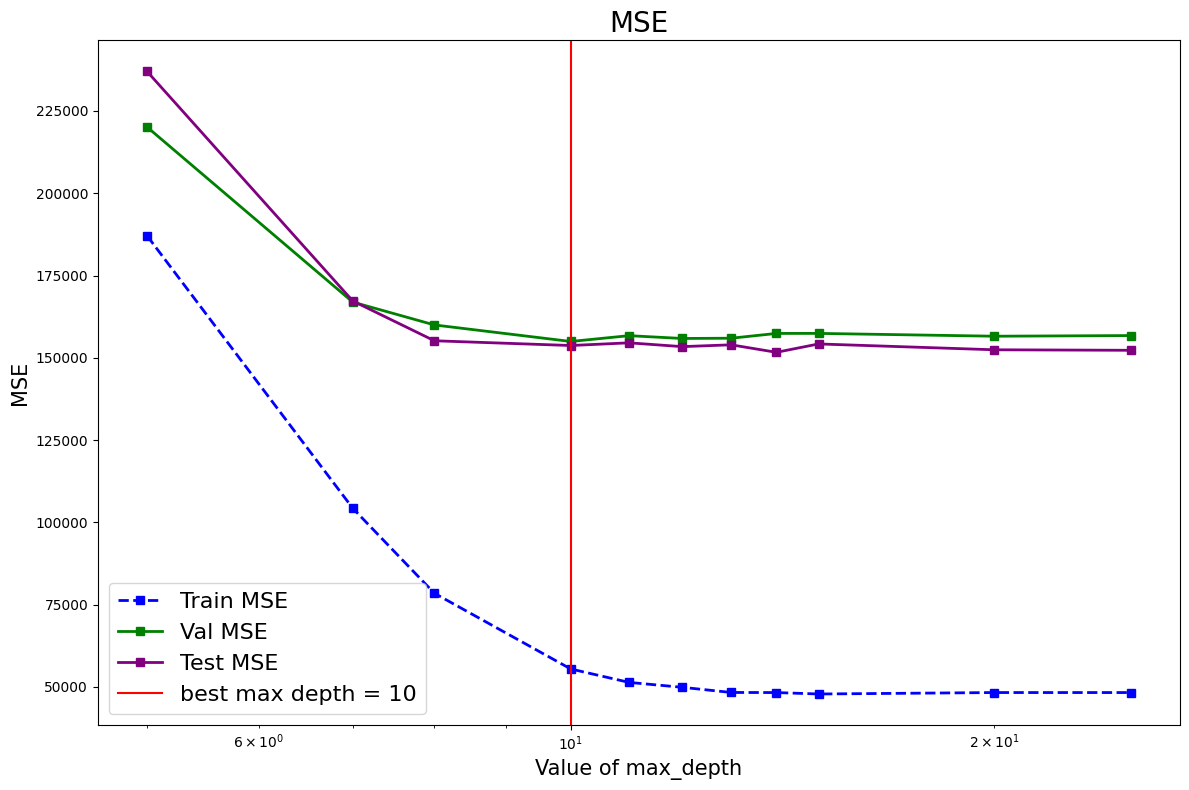

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(depths, train_MSE, 's--', label = 'Train MSE', color = 'blue', linewidth = 2)

ax.plot(depths, val_MSE, 's-', label = 'Val MSE', color ='green', linewidth = 2)

ax.plot(depths, test_MSE, 's-', label = 'Test MSE', color ='purple', linewidth = 2)

ax.axvline(best_max_depth, 0, 1, color = 'r', label = f'best max depth = {best_max_depth}')

ax.set_xlabel('Value of max_depth', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('MSE', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [22]:

regr = RandomForestRegressor(max_depth = best_max_depth, random_state=0, criterion='squared_error')
regr.fit(X_train, y_train)

y_pred_train_val = regr.predict(X_train_val)
y_pred_test = regr.predict(X_test)

In [25]:

MSE_train = mean_squared_error(y_train_val, y_pred_train_val)
r_score_train = regr.score(X_train_val, y_pred_train_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
r_score_test = regr.score(X_test, y_pred_test)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  80370.75757908127
r2 score train =  1.0
MSE test =  153730.8542761165
r2 score test =  1.0


## Model selection cho random forest dùng phương pháp cross validation

In [26]:
from sklearn.model_selection import KFold
import numpy as np

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

depths = [5,7,8, 10,11,12,13,14, 15, 20,25]

kf = KFold(n_splits = 10, shuffle=True) 
trainMSE = []
valMSE = []
testMSE = []
for depth in depths:
    train_MSE = []
    val_MSE = []
    test_MSE = []

    for train_index, val_index in kf.split(X_train):

        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index] 
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        regr = RandomForestRegressor(max_depth = depth, random_state=0, criterion='squared_error')

        regr.fit(X_train_fold, y_train_fold)
        
        y_train_pred = regr.predict(X_train_fold)
        
        y_val_pred = regr.predict(X_val_fold)

        y_test_pred = regr.predict(X_test)

        MSE_train = mean_squared_error(y_train_fold, y_train_pred)
        MSE_val = mean_squared_error(y_val_fold, y_val_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_MSE.append(MSE_train)
        val_MSE.append(MSE_val)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(MSE_train))
    valMSE.append(np.mean(MSE_val))
    testMSE.append(np.mean(MSE_test))
    print('max_depth: {:3} | train fold MSE: {:5} | val fold MSE: {:5} | test MSE: {:5}'.
          format(depth, round(np.mean(MSE_train), 2), round(np.mean(MSE_val), 2), round(np.mean(MSE_test), 2)))

max_depth:   5 | train fold MSE: 177297.2 | val fold MSE: 173865.88 | test MSE: 213647.56
max_depth:   7 | train fold MSE: 100213.16 | val fold MSE: 180995.13 | test MSE: 161084.7
max_depth:   8 | train fold MSE: 72072.43 | val fold MSE: 231158.8 | test MSE: 151365.02
max_depth:  10 | train fold MSE: 45913.85 | val fold MSE: 166178.08 | test MSE: 149384.84
max_depth:  11 | train fold MSE: 49300.45 | val fold MSE: 127575.86 | test MSE: 145005.91
max_depth:  12 | train fold MSE: 42437.39 | val fold MSE: 146273.28 | test MSE: 148235.11
max_depth:  13 | train fold MSE: 24040.12 | val fold MSE: 1476029.28 | test MSE: 148061.68
max_depth:  14 | train fold MSE: 47154.35 | val fold MSE: 182810.59 | test MSE: 145573.83
max_depth:  15 | train fold MSE: 36860.27 | val fold MSE: 179778.93 | test MSE: 146840.48
max_depth:  20 | train fold MSE: 56873.88 | val fold MSE: 110188.63 | test MSE: 146620.29
max_depth:  25 | train fold MSE: 35931.14 | val fold MSE: 180282.02 | test MSE: 161997.87


In [28]:
best_max_depth = 12


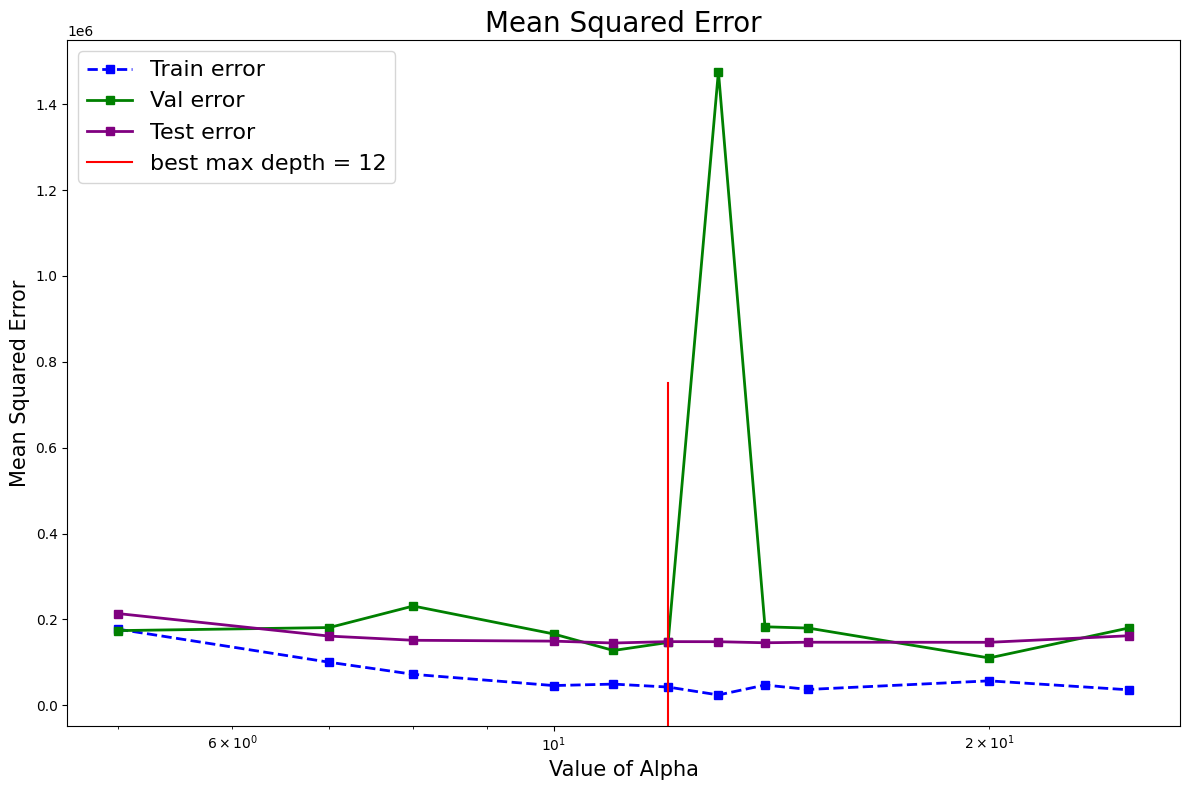

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(depths, trainMSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(depths, valMSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(depths, testMSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_max_depth, 0, 0.5, color = 'r', label = f'best max depth = {best_max_depth}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [30]:
regr = RandomForestRegressor(max_depth = best_max_depth, random_state=0, criterion='squared_error')

regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

y_test_pred = regr.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

print('train MSE: {:5} | test MSE: {:5}'.
    format(round(MSE_train, 2), round(MSE_test, 2)))

train MSE: 48276.94 | test MSE: 146958.53
